In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm
from datetime import datetime, timedelta
from pytz import timezone
import pytz
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
import matplotlib
import scipy.signal as signal



jet= cm.get_cmap('jet', 22)


# import os
# os.environ["PROJ_LIB"] = "C:\\Users\\USUARIO\\Anaconda3\\Library\\share"
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
# from matplotlib.patches import Polygon

import matplotlib as mpl
plt.style.use('seaborn-paper')
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['font.sans-serif'] = 'Century Gothic'
mpl.rcParams['font.family'] = 'Century Gothic'
mpl.rcParams['font.weight'] = 'normal'

# Lectura de datos 

In [2]:
paths = glob.glob(r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\CTD\Jhonny_Cay\*.csv")

In [3]:
len(paths)

11

## Metadatos

In [4]:
metadata = pd.read_csv(paths[0], delimiter = ",", nrows = 23,names=['Device', 'Value']) # Modeficar ruta
for i in range (0, metadata.shape[0]):
    if metadata['Device'].values[i][0:2]=='% ':
        metadata['Device'][i] = metadata['Device'][i][2:len(metadata['Device'][i])] 
    
# metadata.set_index("% Device")
metadata

,Device,Value
0,Device,CC1314009
1,File name,CC1314009_20211112_174117
2,Cast time (UTC),2021-11-12 17:41:17
3,Cast time (local),2021-11-12 12:41:17
4,Sample type,Cast
5,Cast data,Processed
6,Location source,GPS
7,Default latitude,32
8,Default altitude,0
9,Start latitude,12.6018696


## Datos

In [5]:
data = pd.read_csv(paths[0], delimiter = ",", header = 28) # Modeficar ruta
df = pd.DataFrame(data = np.c_[data['Depth (Meter)'].values,data['Temperature (Celsius)'].values,\
                               data['Salinity (Practical Salinity Scale)'].values], columns =['Depth','Temp','Sal'])
df

,Depth,Temp,Sal
0,0.149929,29.418544,36.009418
1,0.449791,29.417343,35.971088
2,0.749652,29.421197,36.015332
3,1.049510,29.412540,35.992945
4,1.349371,29.413584,35.976953
5,1.649232,29.414703,36.004273
6,1.949092,29.426308,35.977912
7,2.248952,29.418947,36.006748
8,2.548808,29.423121,36.004579
9,2.848666,29.422197,36.000199


# Crear diccionario

In [6]:
%%time
Datos = {}
Datos_Dp = {}
time = []
lat = np.zeros(shape = len(paths))
lon = np.zeros(shape = len(paths))
DepthEnd = np.zeros(shape=len(paths))
for i in range (0, len(paths)):
    metadata = pd.read_csv(paths[i], delimiter = ",", nrows = 23,names=['Device', 'Value']) # Modeficar ruta
    for j in range (0, metadata.shape[0]):
        if metadata['Device'].values[j][0:2]=='% ':
            metadata['Device'][j] = metadata['Device'][j][2:len(metadata['Device'][j])]   
    # metadata.set_index("% Device")
    lat[i] = float(metadata[metadata.Device == 'Start latitude'].Value.values)
    lon[i] = float(metadata[metadata.Device == 'Start longitude'].Value.values)
    Time = metadata[metadata.Device == 'Cast time (local)'].Value.values
    time.append(Time)
    if (i < 9):
        name = 'JP0'+str(i+1)+' '+str(Time[0])
    else:
        name = 'JP'+str(i+1)+' '+str(Time[0])
#     print(name)
    data = pd.read_csv(paths[i], delimiter = ",", header = 28) # Modeficar ruta
    df = pd.DataFrame(data = np.c_[data['Depth (Meter)'].values,data['Temperature (Celsius)'].values,\
                               data['Salinity (Practical Salinity Scale)'].values], columns =['Depth','Temp','Sal'])
    DepthEnd[i] = df.Depth.values[-1]
    depthstr = str(round(df.Depth.values[-1],4))
    if str(round(df.Depth.values[-1],1))[1]== '.':
        depthstr = '0'+ depthstr
    else: 
        pass
    
    if (i < 9):
        name_Depth = depthstr+'_JP0'+str(i+1)
    else:
        name_Depth = depthstr+'_JP'+str(i+1)
    Datos.setdefault(name,df)
    Datos_Dp.setdefault(name_Depth,df)
Puntos = [i for i in Datos.keys()]            # Obtener las variables del espectro 
Puntos
Puntos_Dp = sorted(Datos_Dp.keys())
Puntos_Dp

Wall time: 830 ms


['02.4429_JP05',
 '02.5619_JP04',
 '02.9748_JP11',
 '03.0142_JP06',
 '03.2806_JP03',
 '03.3894_JP07',
 '04.2714_JP02',
 '04.5944_JP01',
 '04.9665_JP10',
 '05.4148_JP09',
 '08.9439_JP08']

# Gráficas de perfiles

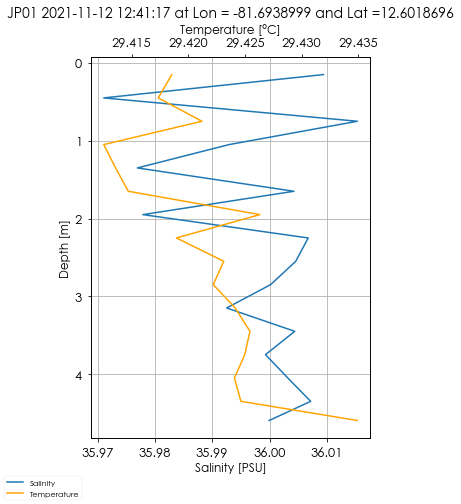

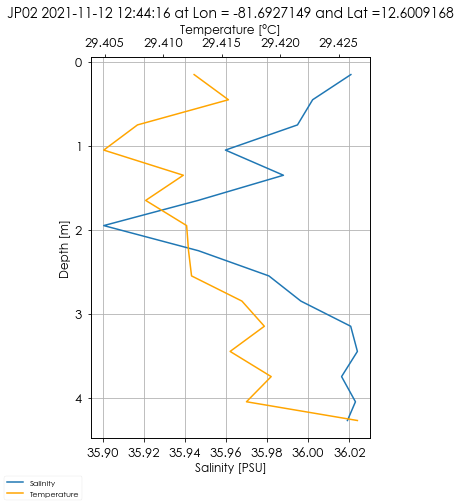

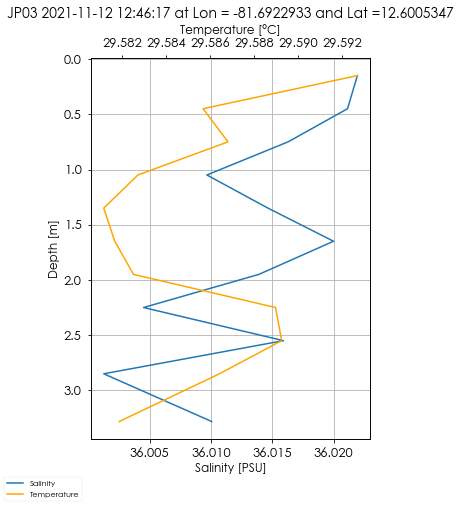

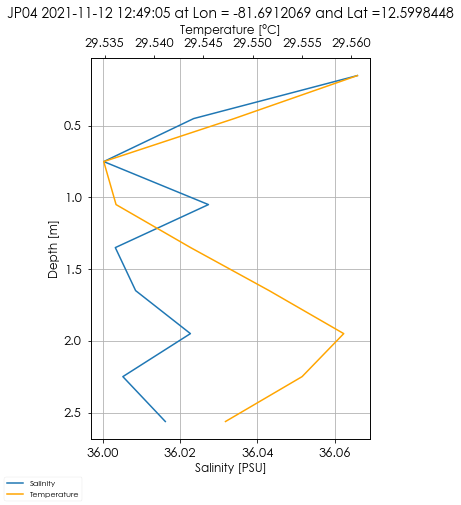

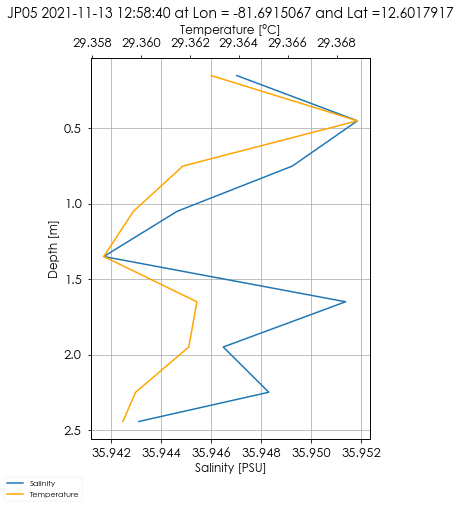

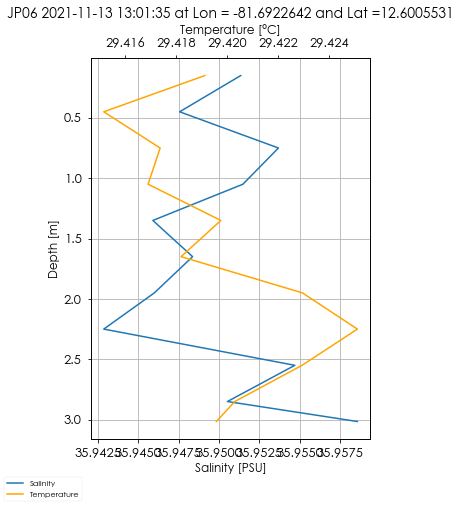

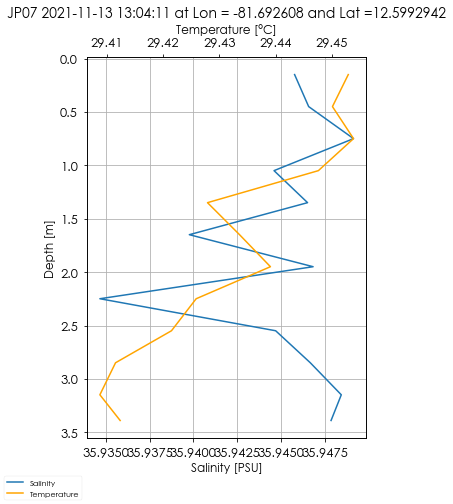

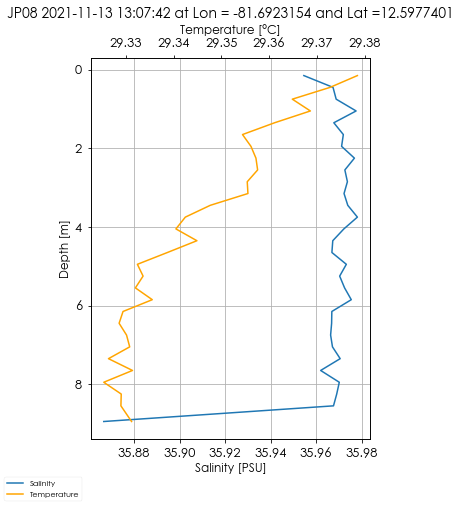

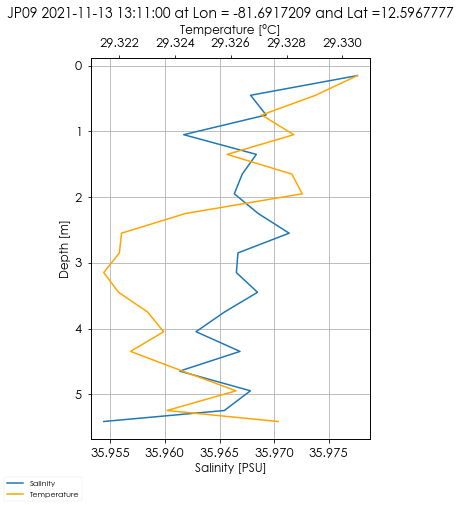

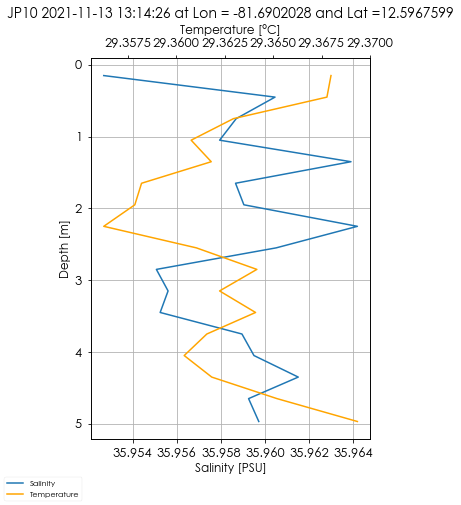

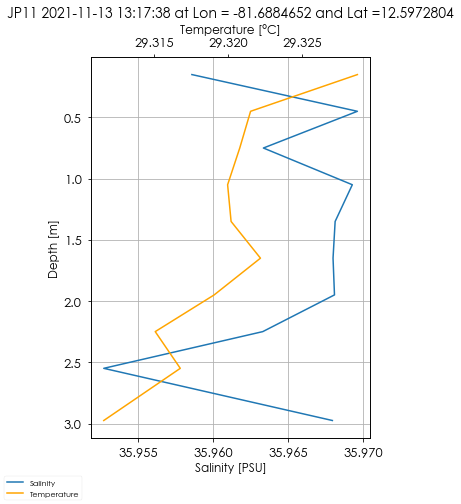

In [7]:
for i in range (0, len(paths)):
    fig, ax = plt.subplots(figsize=(5,7))
    p1 = ax.plot(Datos[Puntos[i]].Sal.values,Datos[Puntos[i]].Depth.values,lw=1.5,alpha=1,ls ='-', label = 'Salinity')
    ax.set_ylabel('Depth [m]',size=12)
    ax.set_xlabel('Salinity [PSU]',size=12)
    ax.xaxis.tick_top()
    ax.invert_yaxis()

    ax.grid()
    ax2 = ax.twiny()
    p2 = ax2.plot(Datos[Puntos[i]].Temp.values,Datos[Puntos[i]].Depth.values,lw=1.5,alpha=1,ls ='-',color = 'orange', label = 'Temperature')
    ax2.set_ylabel('Depth [m]',size=12)
    ax2.set_xlabel('Temperature [°C]',size=12)

    fig.legend(loc=3)
    # plt.legend([p1,p2],loc=3)
    ax.set_title(Puntos[i]+' at Lon = '+ str(lon[i])+' and Lat ='+ str(lat[i]), size=14)

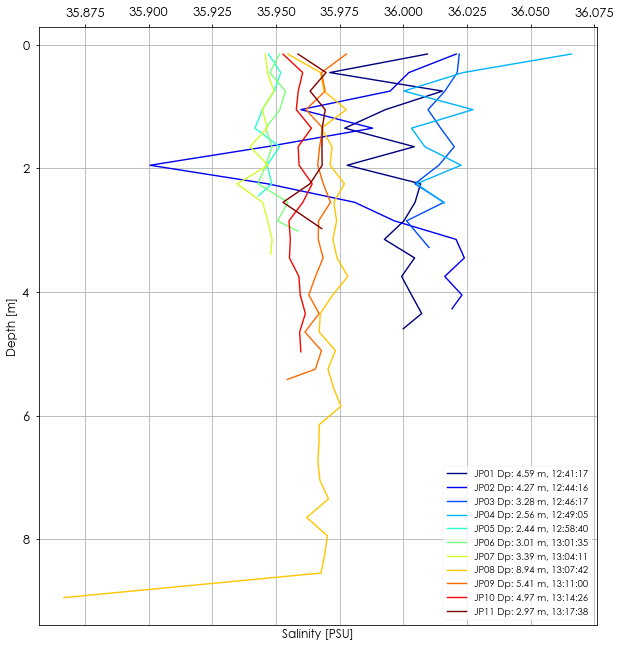

In [8]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos[Puntos[i]].Sal.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Salinity [PSU]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=9.5)

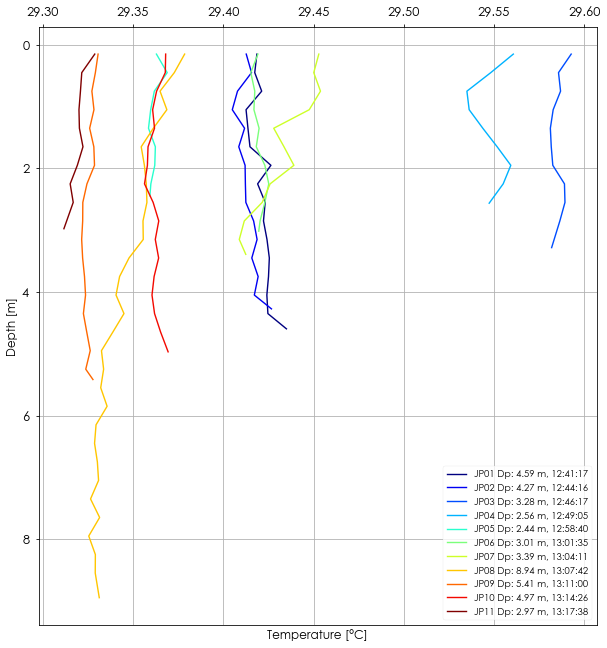

In [9]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos[Puntos[i]].Temp.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Temperature [°C]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(loc = 4, fontsize=9.5)

In [19]:
time_str = [str(time[i][0]) for i in range(0, len(paths))]
time_data = np.array([datetime.strptime(i,'%Y-%m-%d %H:%M:%S') for i in time_str])
df_depth = pd.DataFrame(data = np.c_[time_data,DepthEnd,lat,lon], columns=['time','Depth','lat','lon'])
df_sort = df_depth.sort_values('Depth')
df_sort

,time,Depth,lat,lon
4,2021-11-13 12:58:40,2.44292,12.6018,-81.6915
3,2021-11-12 12:49:05,2.56191,12.5998,-81.6912
10,2021-11-13 13:17:38,2.97483,12.5973,-81.6885
5,2021-11-13 13:01:35,3.01423,12.6006,-81.6923
2,2021-11-12 12:46:17,3.2806,12.6005,-81.6923
6,2021-11-13 13:04:11,3.38942,12.5993,-81.6926
1,2021-11-12 12:44:16,4.2714,12.6009,-81.6927
0,2021-11-12 12:41:17,4.59442,12.6019,-81.6939
9,2021-11-13 13:14:26,4.96653,12.5968,-81.6902
8,2021-11-13 13:11:00,5.41481,12.5968,-81.6917


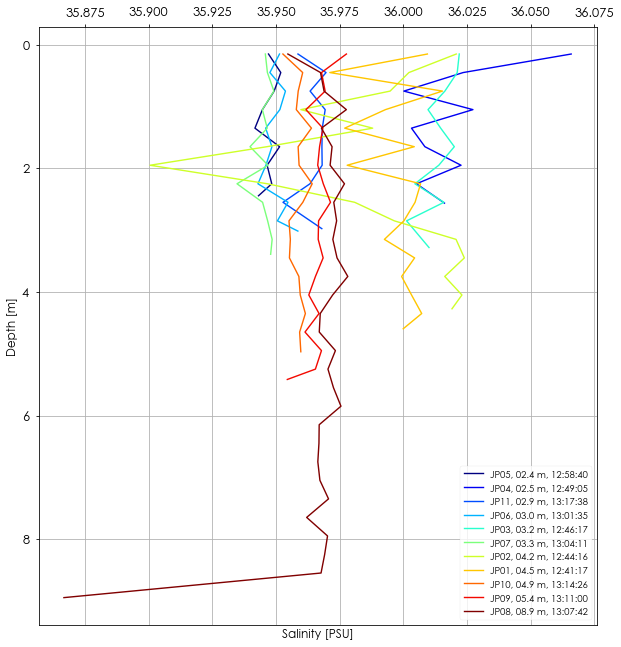

In [11]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos_Dp[Puntos_Dp[i]].Sal.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Salinity [PSU]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=9.5)

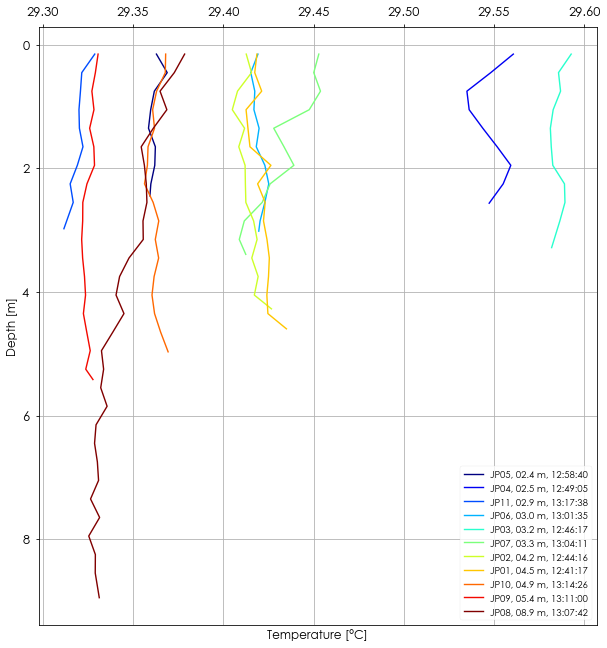

In [12]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos_Dp[Puntos_Dp[i]].Temp.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Temperature [°C]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=9.5)

# Mapa

In [13]:
delta = 0.00013474659999999                                         # Tamaño de la grilla 
x = np.array ([-81.703803587898 + i*delta for i in range(229)]) # Menor longitud, Numero de divisiones revisar archivo ASCI (output ARCGIS)
y = np.array ([12.580924161961 + i*delta for i in range (207)])        # Menor Latitud,  Numero de divisiones revisar archivo ASCI (output ARCGIS)
z = np.flipud(np.genfromtxt(r'E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/SIMU_NOSTAT/Caso6/M_15m/idw_15m.txt',skip_header = 6))
z[z == -9999] = np.nan # Z donde es tierra
# suavizar batimetria y recortar bordes
# -------------------------------------
kernel = np.ones((1,1))/1.
z_smooth = signal.convolve2d(z, kernel, "same")
z_smooth = np.ma.masked_array(z, mask=np.isnan(z_smooth))
x_new = x.copy()
y_new = y.copy()
z_new = z_smooth.copy()
#---------------------------------------
lc = np.genfromtxt(r'E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/SIMU_NOSTAT/Caso6/M_15m/Linea_Costa_15m.txt',\
                   missing_values = 'nan',delimiter = ' ')
lc[:,0] = lc[:,0] 

In [20]:
#---------------Ubicacion de puntos en mapa------------------------------------
Lat_map = np.zeros(shape = len(paths))
Lon_map = np.zeros(shape = len(paths))
for i in range (0, len(paths)):
    indlat = np.where((df_sort.lat.values[i]<(y+0.00007)) & (df_sort.lat.values[i]>(y-0.00007)))[0][0]
    indlon = np.where((df_sort.lon.values[i]<(x+0.00007)) & (df_sort.lon.values[i]>(x-0.00007)))[0][0]
    print(indlon)
    Lat_map[i] = y[indlat]
    Lon_map[i] = x[indlon]

df_sort['latMap'] = Lat_map 
df_sort['lonMap'] = Lon_map
df_sort['errorlat'] = abs(df_sort.latMap.values - df_sort.lat.values)*(111100)
df_sort['errorlon'] = abs(df_sort.lonMap.values - df_sort.lon.values)*(111100)
df_crono = df_sort.sort_values('time')

91
93
114
86
85
83
82
73
101
90
85


In [15]:
df_sort

,Depth,lat,lon,latMap,lonMap,errorlat,errorlon
2021-11-13 12:58:40,2.442921,12.601792,-81.691507,12.601810,-81.691542,2.020349,3.882645
2021-11-12 12:49:05,2.561908,12.599845,-81.691207,12.599789,-81.691272,6.234270,7.249730
2021-11-13 13:17:38,2.974832,12.597280,-81.688465,12.597229,-81.688442,5.766028,2.524692
2021-11-13 13:01:35,3.014226,12.600553,-81.692264,12.600597,-81.692215,4.895684,5.423869
2021-11-12 12:46:17,3.280597,12.600535,-81.692293,12.600597,-81.692350,6.939924,6.313468
2021-11-13 13:04:11,3.389418,12.599294,-81.692608,12.599250,-81.692620,4.943999,1.290993
2021-11-12 12:44:16,4.271402,12.600917,-81.692715,12.600867,-81.692754,5.570692,4.384750
2021-11-12 12:41:17,4.594415,12.601870,-81.693900,12.601810,-81.693967,6.634341,7.464375
2021-11-13 13:14:26,4.966532,12.596760,-81.690203,12.596824,-81.690194,7.150481,0.957538
2021-11-13 13:11:00,5.414812,12.596778,-81.691721,12.596824,-81.691676,5.172901,4.944628


C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


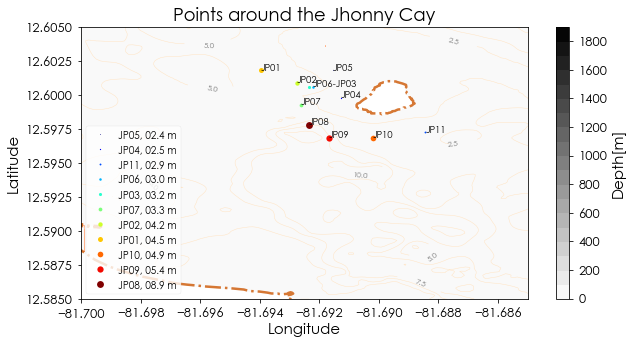

In [16]:
# crear figura
# ------------
fig, ax = plt.subplots(figsize = (10,5))
# colormap = reverse_colourmap(cm.RdYlBu)
# colormap = reverse_colourmap(cm.YlGnBu)
# colormap = cm.Blues
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,2.5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
# bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='k')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
    shp_scatter[i] = i+1
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,ms=shp_scatter[i]/1.6, ls = ' ', \
               label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
#------------ Anotar los nombres de los puntos generales--------------------
#     ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 10)
    if (i != 3) & (i!= 4):
        ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 9.5)
    elif i == 3:
         ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:])+'-'+\
                 str(Puntos_Dp[4][-4:]) , fontsize = 9.5)
#     else: 
#         pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
# ax.set_xlim([x_new.min(), x_new.max()])
# ax.set_ylim([y_new.min(), y_new.max()])
ax.set_xlim([-81.700, -81.685])
ax.set_ylim([12.585, 12.605])
cb.set_label('Depth[m]',size=15)
ax.set_title('Points around the Jhonny Cay',size = 18)
_= ax.legend(loc = 3,fontsize = 10)
ax.grid(False)

In [17]:
# # crear figura
# # ------------
# fig, ax = plt.subplots(figsize = (10,7))
# # colormap = reverse_colourmap(cm.RdYlBu)
# # colormap = reverse_colourmap(cm.YlGnBu)
# # colormap = cm.Blues
# colormap = cm.binary
# pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
# cb=plt.colorbar(pc)
# #  cb=plt.colorbar(pc, orientation="horizontal")

# a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
#                linewidths=1)
# b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
#                linewidths=0.5)
# c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,5)),colors="bisque",\
#                linewidths=0.5)

# aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
# # bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='k')
# cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

# shp_scatter = np.zeros(shape = len (paths)) 
# # for i in range (0, len(paths)):
# #     shp_scatter[i] = i+1
# #     colorVal = scalarMap.to_rgba(i)
# #     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
# #                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.plot(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,ms=shp_scatter[i]/2, ls = ' ', \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
# #------------ Anotar los nombres de los puntos generales--------------------
# #     if (i != 5) & (i!= 7):
#     ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 8.5)
# #     elif i == 5:
# #          ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:])+'-'+\
# #                  str(Puntos_Dp[7][-4:]) , fontsize = 10)
# #     else: 
# #         pass
            
# ax.set_xlabel ('Longitude',size=15)
# ax.set_ylabel ('Latitude',size=15)
# ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
# # ax.set_xlim([x_new.min(), x_new.max()])
# # ax.set_ylim([y_new.min(), y_new.max()])
# ax.set_xlim([-81.7375, -81.720])
# ax.set_ylim([12.566, 12.58])
# cb.set_label('Depth[m]',size=15)
# ax.set_title('Points around the submarine emissary of San Andrés island',size = 18)
# _= ax.legend(loc='center left', bbox_to_anchor=(1.22, 0.5),fontsize = 10)
# ax.grid(False)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


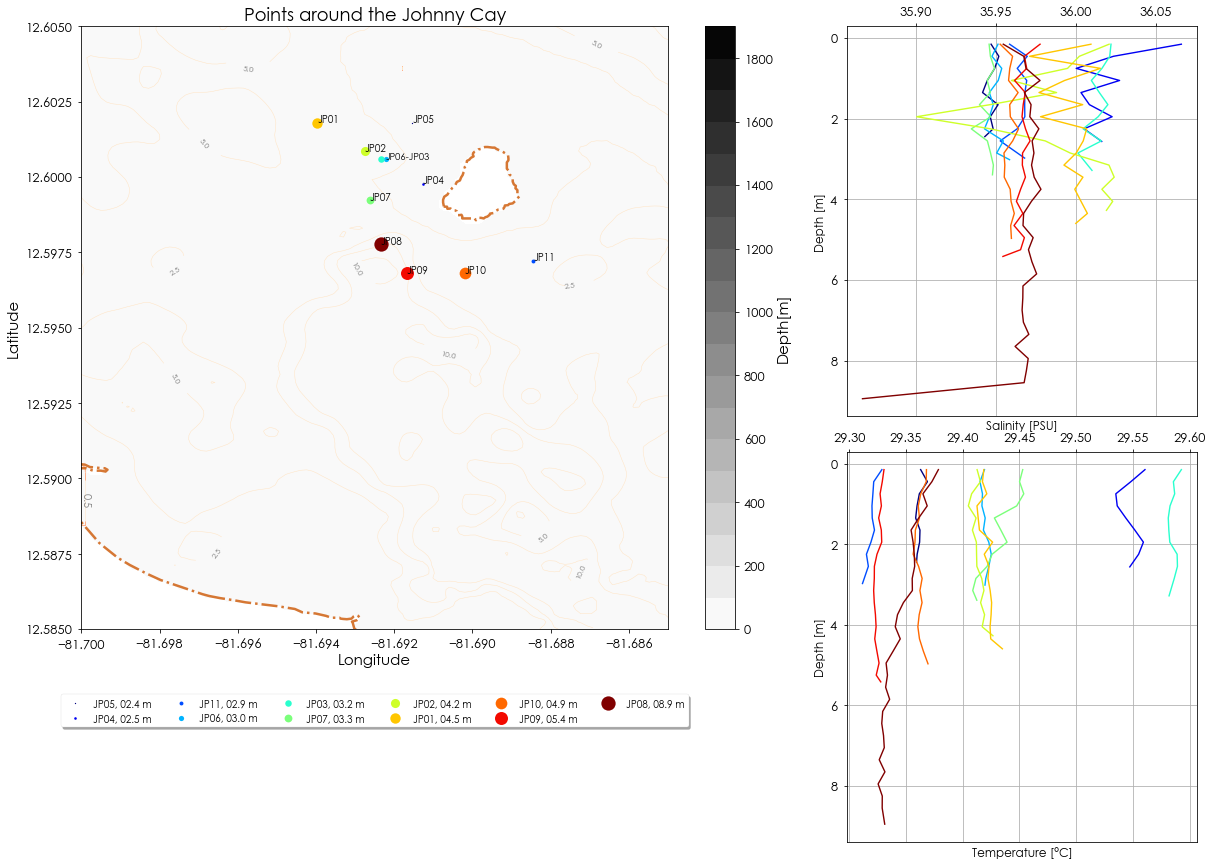

In [18]:
# crear figura
# ------------
plt.close()
fig = plt.figure (figsize = (20,15))
ax = plt.subplot2grid((4,6),(0,0),colspan = 4,rowspan=3)
# ax = plt.subplot(2,3, (1,3))
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,2.5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
# bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='k')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
    shp_scatter[i] = i+1
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,ms=shp_scatter[i]*1.3, ls = ' ', \
               label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
#------------ Anotar los nombres de los puntos generales--------------------
#     ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 10)
    if (i != 3) & (i!= 4):
        ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 10)
    elif i == 3:
         ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:])+'-'+\
                 str(Puntos_Dp[4][-4:]) , fontsize = 9.5)
#     else: 
#         pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
# ax.set_xlim([x_new.min(), x_new.max()])
# ax.set_ylim([y_new.min(), y_new.max()])
ax.set_xlim([-81.700, -81.685])
ax.set_ylim([12.585, 12.605])
cb.set_label('Depth[m]',size=15)
ax.set_title('Points around the Johnny Cay',size = 18)
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6, fontsize = 10)
ax.grid(False)

ax1 = plt.subplot2grid((4,6),(0,4),rowspan=2,colspan=2)
# ax1 = plt.subplot(222)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax1.plot(Datos_Dp[Puntos_Dp[i]].Sal.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax1.set_ylabel('Depth [m]',size=12)
ax1.set_xlabel('Salinity [PSU]',size=12)
ax1.xaxis.tick_top()
ax1.invert_yaxis()
ax1.grid()
# ax1.set_figheight(5)
# ax1.set_figwidth(5)
# _= ax1.legend(fontsize=11)

ax2 = plt.subplot2grid((4,6),(2,4),rowspan=2,colspan=2)
# ax2 = plt.subplot(224)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax2.plot(Datos_Dp[Puntos_Dp[i]].Temp.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax2.set_ylabel('Depth [m]',size=12)
ax2.set_xlabel('Temperature [°C]',size=12)
ax2.xaxis.tick_top()
ax2.invert_yaxis()
ax2.grid()
# _= ax2.legend(fontsize=11)
ruta = r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\CTD"  
plt.savefig(ruta+'\Jhonny_Cay_Profailes_SAI.png',dpi=800,bbox_inches='tight',pad_inches=0)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


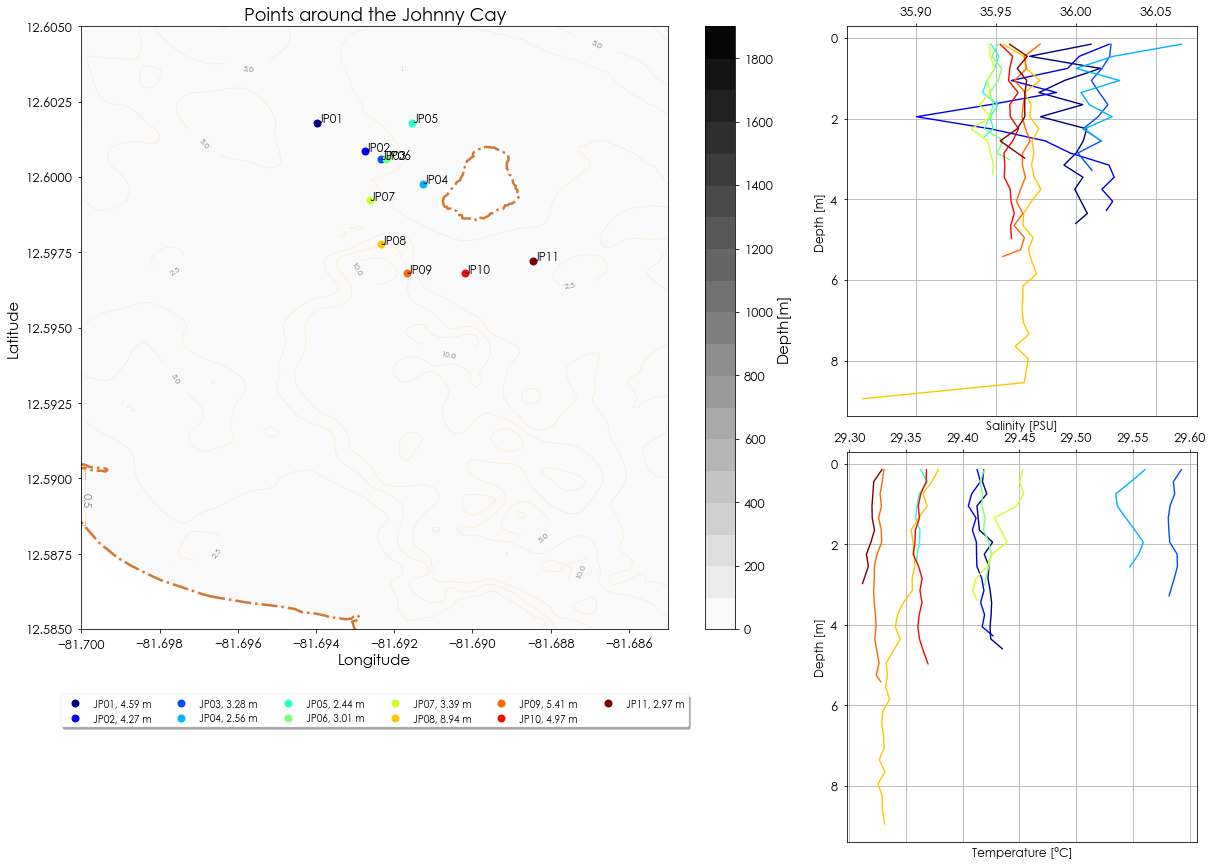

In [21]:
# crear figura
# ------------
plt.close()
fig = plt.figure (figsize = (20,15))
ax = plt.subplot2grid((4,6),(0,0),colspan = 4,rowspan=3)
# ax = plt.subplot(2,3, (1,3))
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,2.5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
# bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='k')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
#     shp_scatter[i] = df_sort.Depth.values[i]/5
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_crono.lonMap.values[i],df_crono.latMap.values[i],marker="o",color = colorVal,ms=8, ls = ' ', \
               label = str(Puntos[i][0:4])+', '+ str(round(DepthEnd[i],2))+' m')
#------------ Anotar los nombres de los puntos generales--------------------
#     if (i != 0) & (i!= 1):
    ax.text(df_crono.lonMap.values[i],df_crono.latMap.values[i],str(Puntos[i][0:4]), fontsize = 12)
#     elif i == 0:
#          ax.text(df_crono.lonMap.values[i],df_crono.latMap.values[i],str(Puntos[i][0:4])+'-'+\
#                  str(Puntos[1][0:4]) , fontsize = 12)
#     else: 
#         pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
# ax.set_xlim([x_new.min(), x_new.max()])
# ax.set_ylim([y_new.min(), y_new.max()])
ax.set_xlim([-81.700, -81.685])
ax.set_ylim([12.585, 12.605])
cb.set_label('Depth[m]',size=15)
ax.set_title('Points around the Johnny Cay',size = 18)
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6, fontsize = 10)
ax.grid(False)

ax1 = plt.subplot2grid((4,6),(0,4),rowspan=2,colspan=2)
# ax1 = plt.subplot(222)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax1.plot(Datos[Puntos[i]].Sal.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax1.set_ylabel('Depth [m]',size=12)
ax1.set_xlabel('Salinity [PSU]',size=12)
ax1.xaxis.tick_top()
ax1.invert_yaxis()
ax1.grid()
# _= ax1.legend(fontsize=11)

ax2 = plt.subplot2grid((4,6),(2,4),rowspan=2,colspan=2)
# ax2 = plt.subplot(224)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax2.plot(Datos[Puntos[i]].Temp.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax2.set_ylabel('Depth [m]',size=12)
ax2.set_xlabel('Temperature [°C]',size=12)
ax2.xaxis.tick_top()
ax2.invert_yaxis()
ax2.grid()
# _= ax2.legend(fontsize=11)
ruta = r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\CTD"  
plt.savefig(ruta+'\Johnny_Cay_Profailes_SAI_2.png',dpi=800,bbox_inches='tight',pad_inches=0)